In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


# Load the CSV file
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()



label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [3]:
# Info about data types and nulls
df.info()

df.isnull().sum()

#Cleaning the data
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df['message'] = df['message'].str.replace('[^a-zA-Z\s]', '', regex=True).str.lower()

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\aqilw\AppData\Local\Temp\ipykernel_5020\546014198.py:8: SyntaxWarning: invalid escape sequence '\s'
  df['message'] = df['message'].str.replace('[^a-zA-Z\s]', '', regex=True).str.lower()


label                                            message
0      0  go until jurong point crazy available only in ...
1      0                            ok lar joking wif u oni
2      1  free entry in  a wkly comp to win fa cup final...
3      0        u dun say so early hor u c already then say
4      0  nah i dont think he goes to usf he lives aroun...

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.88      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.979372197309417


C:\Users\aqilw\AppData\Local\Temp\ipykernel_5020\4012865531.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


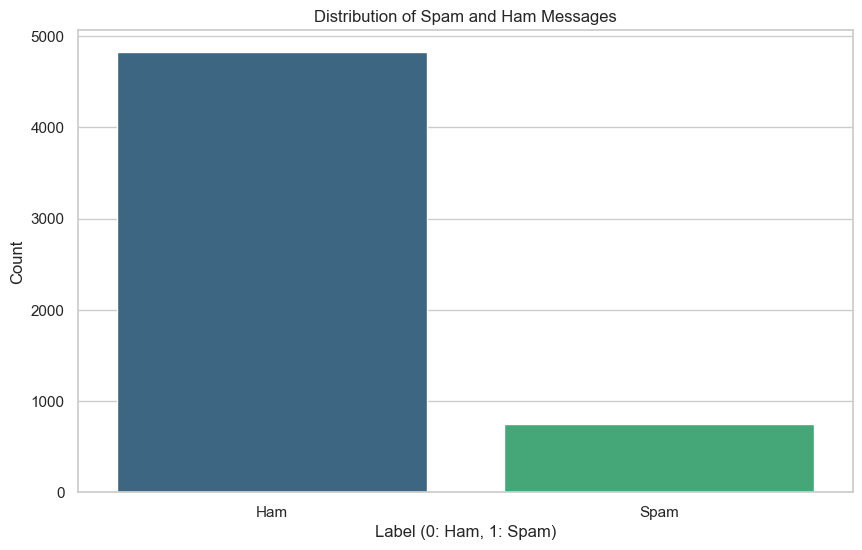

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()



In [5]:
# Save the model and vectorizer
import joblib
joblib.dump(model, 'spam_classifier.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']